## Análisis de accidentes - Buses

### Area metropolitana del Valle de Aburrá

Manuela Cordoba

Alejandro Fernandez

Ana María Jaramillo

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pycaret.classification import *
from sklearn.model_selection import train_test_split
from imblearn.combine import *
import config

In [ ]:
cleaned_data_spatial_info = pd.read_excel(config.DATASET_WITH_SPATIAL_INFO)

In [24]:
df.columns

Index(['periodo', 'tipo_geoco', 'gravedad', 'diseno', 'mes', 'dia',
       'areagralus', 'cod_subcat', 'subcategor', 'hierarchy', 'road_class',
       'estrato_pr', 'clase_acci', 'clase_vehi', 'tipo_servi', 'marca',
       'modelo', 'zona', 'edad_condu', 'sexo', 'dia_semana', 'hora', 'Gi_Bin',
       'LMiIndex', 'LMiPValue', 'COType'],
      dtype='object')

In [25]:
columns_list = [col for col in df.columns if col != 'gravedad']

# Separate numeric and string columns
numeric_columns = []
string_columns = []

# Check if each column is numeric or contains strings
for col in columns_list:
    if pd.to_numeric(df[col], errors='coerce').notnull().all():
        numeric_columns.append(col)
    else:
        string_columns.append(col)

# Print numeric and string columns
print("Numeric Columns:", numeric_columns)
print("String Columns:", string_columns)


Numeric Columns: ['periodo', 'mes', 'dia', 'cod_subcat', 'hierarchy', 'road_class', 'estrato_pr', 'modelo', 'edad_condu', 'hora', 'Gi_Bin', 'LMiIndex', 'LMiPValue']
String Columns: ['tipo_geoco', 'diseno', 'areagralus', 'subcategor', 'clase_acci', 'clase_vehi', 'tipo_servi', 'marca', 'zona', 'sexo', 'dia_semana', 'COType']


In [26]:
# Remove 'mes' and 'dia' from the numeric columns list
numeric_columns.remove('mes')
numeric_columns.remove('dia')

# Add 'mes' and 'dia' to the string columns list
string_columns.extend(['mes', 'dia'])

# remove exeptions
#string_columns.remove('clase_acci')

In [27]:
df['gravedad'].value_counts(normalize=True)


damage_only    0.750722
injured        0.249278
Name: gravedad, dtype: float64

In [28]:
# Setup the model with manual data type specification
setup(data=df, 
      target='gravedad', 
      fix_imbalance=True, 
      session_id=2023,
      normalize = True,
      data_split_stratify = True,
      fold_strategy = 'stratifiedkfold',
      numeric_features=numeric_columns,
      categorical_features=string_columns)#,
      #ignore_features=['clase_acci'],
      #normalize_method="zscore",
      #transformation=True)

,Description,Value
0,Session id,2023
1,Target,gravedad
2,Target type,Binary
3,Target mapping,"damage_only: 0, injured: 1"
4,Original data shape,"(87649, 26)"
5,Transformed data shape,"(118415, 117)"
6,Transformed train set shape,"(92120, 117)"
7,Transformed test set shape,"(26295, 117)"
8,Numeric features,11
9,Categorical features,14


train_model = compare_models(#turbo=False,
                             sort="recall",
                             round=3)#,
                             #include=["lr", "knn", "dt", "rf", "gbc", "lightgbm"])

In [29]:
train_model = compare_models(sort='Precision')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8602,0.8678,0.5519,0.8305,0.6630,0.5793,0.5986,11.2540
xgboost,Extreme Gradient Boosting,0.8580,0.8604,0.5481,0.8230,0.6580,0.5729,0.5918,1.6960
lightgbm,Light Gradient Boosting Machine,0.8562,0.8547,0.5481,0.8143,0.6551,0.5686,0.5864,1.6070
rf,Random Forest Classifier,0.8570,0.8526,0.5526,0.8142,0.6583,0.5721,0.5893,3.3070
gbc,Gradient Boosting Classifier,0.8543,0.8411,0.5500,0.8035,0.6529,0.5648,0.5811,7.2330
et,Extra Trees Classifier,0.8552,0.8476,0.5566,0.8017,0.6570,0.5689,0.5842,4.5310
ada,Ada Boost Classifier,0.8537,0.8335,0.5505,0.8001,0.6522,0.5635,0.5794,2.6580
nb,Naive Bayes,0.8392,0.8097,0.4870,0.7922,0.6016,0.5081,0.5326,1.0500
svm,SVM - Linear Kernel,0.8493,0.0000,0.5666,0.7685,0.6520,0.5586,0.5693,1.3250
ridge,Ridge Classifier,0.8434,0.0000,0.6012,0.7240,0.6568,0.5565,0.5606,1.1510


In [30]:
best = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8600,0.8671,0.5444,0.8372,0.6598,0.5766,0.5978
1,0.8611,0.8771,0.5601,0.8272,0.6680,0.5843,0.6020
2,0.8642,0.8745,0.5562,0.8468,0.6714,0.5904,0.6111
3,0.8590,0.8654,0.5510,0.8257,0.6609,0.5764,0.5951
4,0.8575,0.8632,0.5546,0.8146,0.6599,0.5739,0.5909
5,0.8611,0.8718,0.5585,0.8283,0.6672,0.5836,0.6017
6,0.8505,0.8553,0.5160,0.8168,0.6325,0.5446,0.5672
7,0.8632,0.8669,0.5644,0.8330,0.6729,0.5905,0.6083
8,0.8582,0.8650,0.5474,0.8246,0.6580,0.5731,0.5923


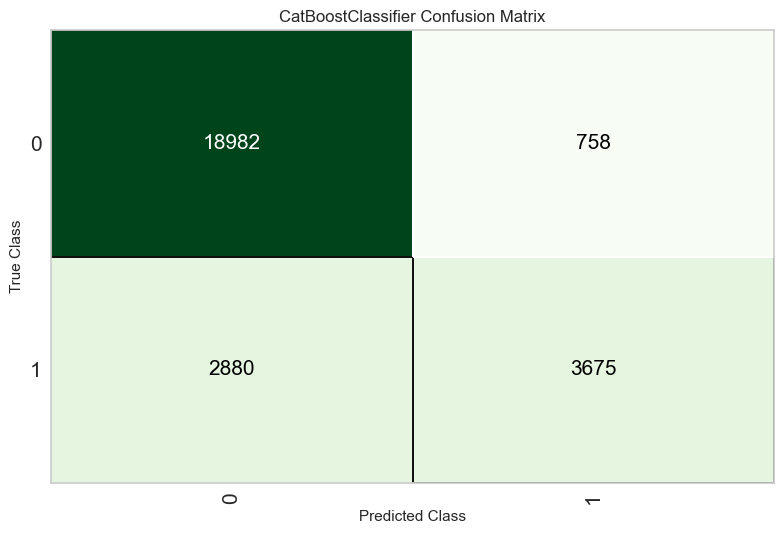

In [31]:
plot_model(best, plot = 'confusion_matrix')

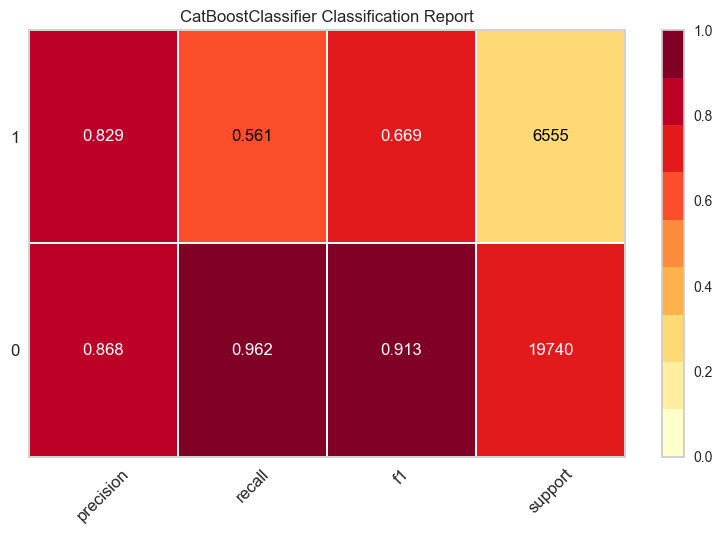

In [32]:
plot_model(estimator=best, plot="class_report")

In [33]:
# tune model
#tuned_dt = tune_model(best, choose_better = True)

#lr, optimize="recall", n_iter=80, early_stopping=True, choose_better=True
#n_iter = 5
#optimize = 'MAE'

In [34]:
#plot_model(tuned_dt, plot = 'confusion_matrix')

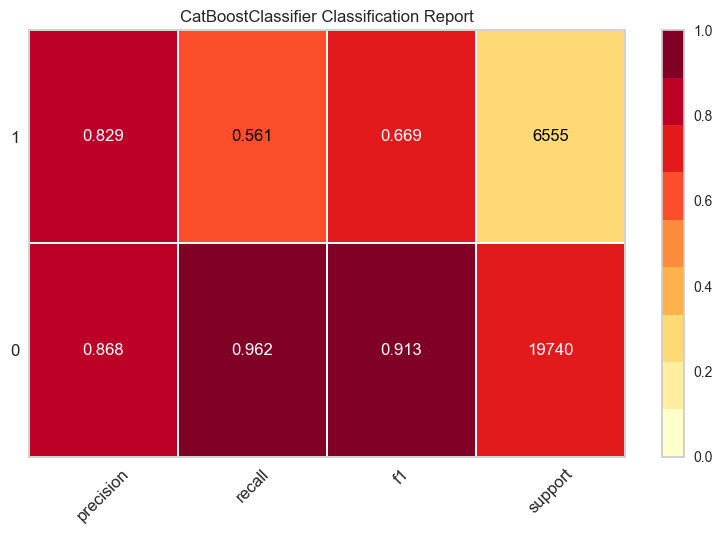

In [35]:
plot_model(estimator=best, plot="class_report")

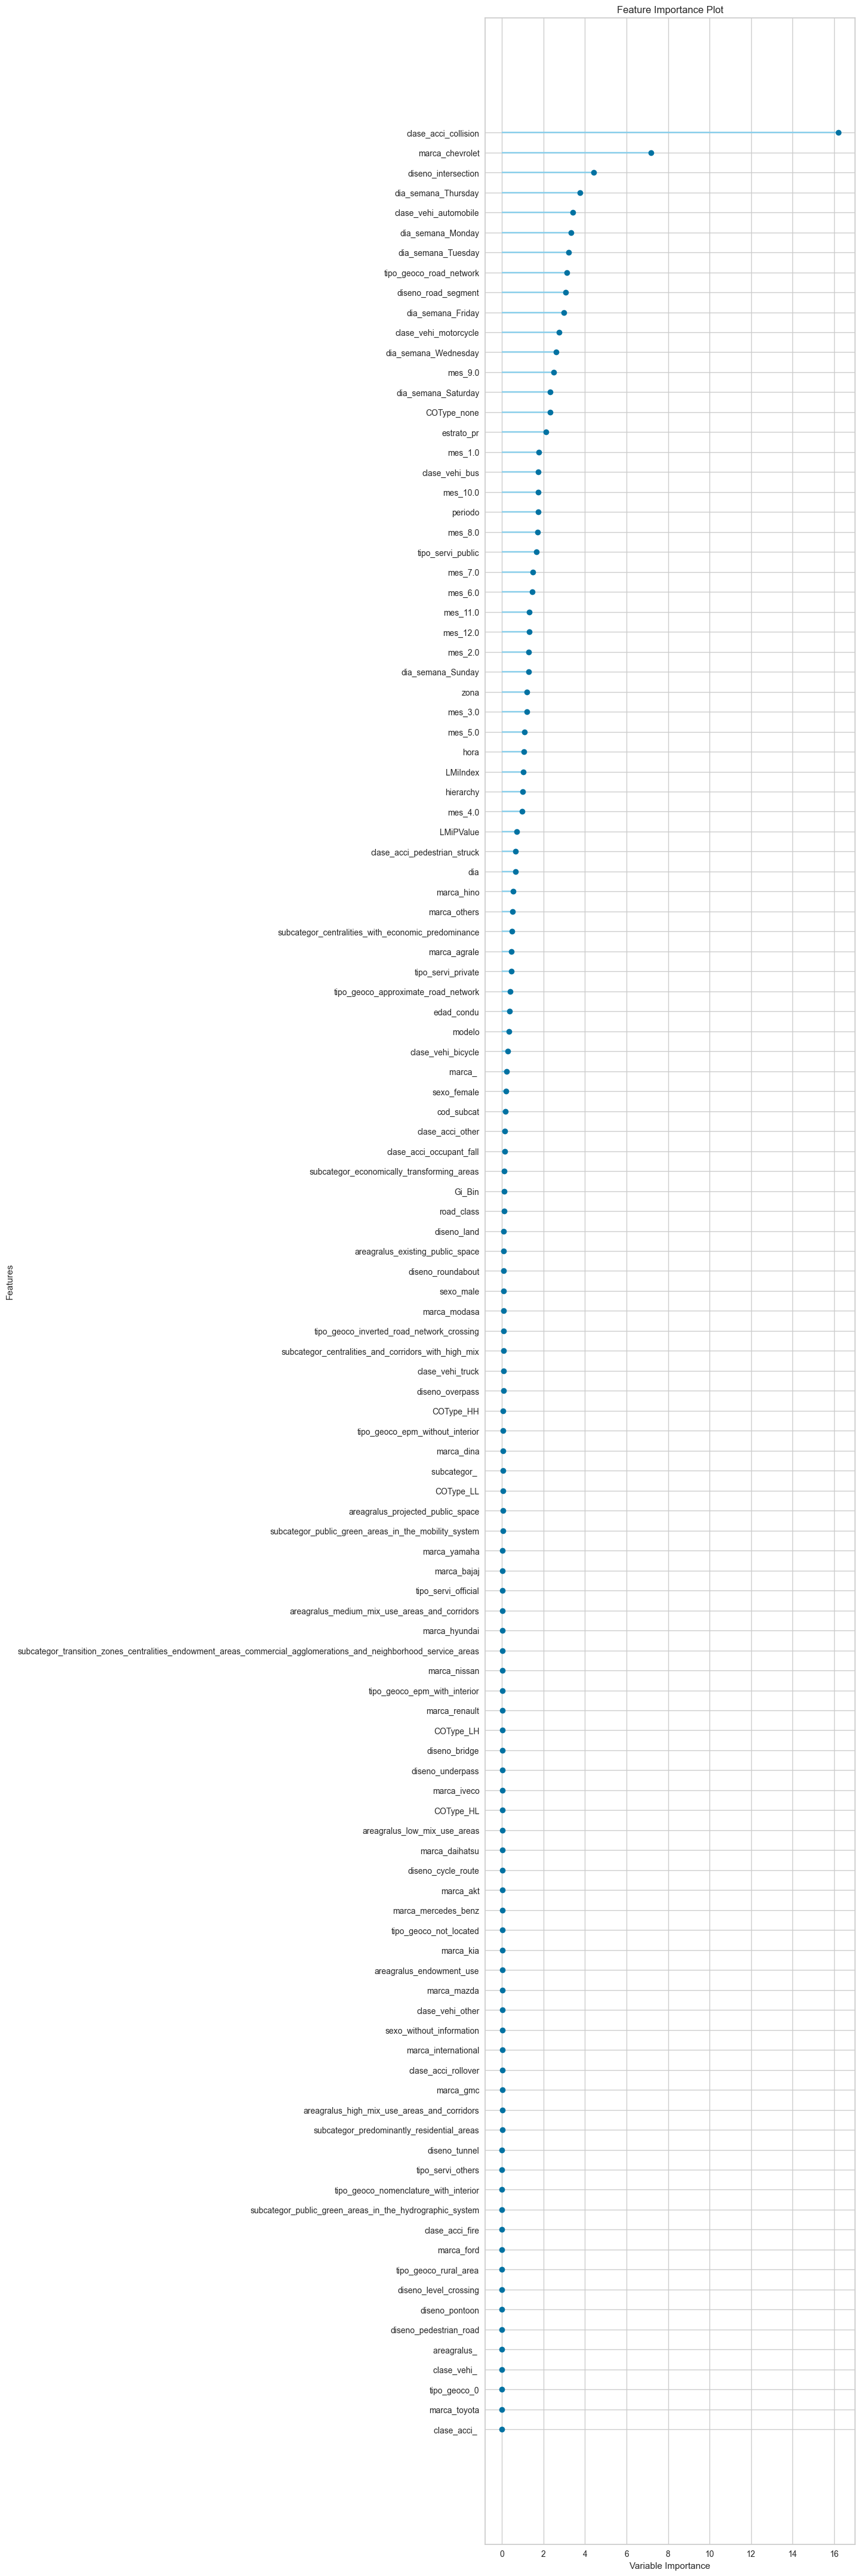

In [36]:
# Visualize feature importance
plot_model(best, plot='feature_all')